# Brewdog Facebook Analysis

## Retrieving Data From Brewdog's Facebook Page

The below code will retrieve the data from Brewdog's facebook page. Facebook's API page was used. I have removed my token ID. 

In [1]:
import requests 
import time
import random
    
token = ""

def req_facebook(req):
    r = requests.get("https://graph.facebook.com/v2.10/" + req , {'access_token' : token})

    return r
    

req="BrewDogOfficial?fields=posts{comments.limit(0).summary(true),likes.limit(0).summary(true),created_time,message}"

results=req_facebook(req).json()



data=[]

results=results['posts']

i=0

while True:

    try:
        time.sleep(random.randint(2,4))
        data.extend(results['data'])
        r=requests.get(results['paging']['next'])
        results= r.json()    
        i += 1


    except:
        print("done")
        break 

done


In [111]:
data[0]

{'comments': {'data': [],
  'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 85}},
 'created_time': '2017-07-29T09:30:00+0000',
 'id': '21251598643_10157023200443644',
 'likes': {'data': [],
  'summary': {'can_like': True, 'has_liked': False, 'total_count': 877}},
 'message': 'When you see a fresh pint of PunkIPA being poured...'}

In [132]:
import pandas as pd 
import string 
from operator import itemgetter
import numpy as np

## Normalising Data

Converting data into a pandas dataframe.

In [112]:
df2 = pd.io.json.json_normalize(data=data)

In [113]:
df2.head(5)

,comments.data,comments.summary.can_comment,comments.summary.order,comments.summary.total_count,created_time,id,likes.data,likes.summary.can_like,likes.summary.has_liked,likes.summary.total_count,message
0,[],True,ranked,85,2017-07-29T09:30:00+0000,21251598643_10157023200443644,[],True,False,877,When you see a fresh pint of PunkIPA being pou...
1,[],True,ranked,42,2017-07-28T16:55:01+0000,21251598643_10157026990843644,[],True,False,195,Rolling towards the weekend...\n\nWhat's first...
2,[],True,ranked,3,2017-07-28T15:12:39+0000,21251598643_10157026772808644,[],True,False,25,“*Drumroll please!*\n\nAnd the winner is… Jenn...
3,[],True,ranked,21,2017-07-28T10:24:41+0000,21251598643_10157026143968644,[],True,False,296,Slot Machine ✔️\n\nHomicidal Puppet Help Desk ...
4,[],True,ranked,107,2017-07-27T15:15:00+0000,21251598643_10157023539678644,[],True,False,807,IT JUST GOT REAL...24 hours left to invest in ...


In [9]:
df2.columns[0]

'comments.data'

## Tidying Columns & Cleaning Null Values

In [114]:
df2.drop( df2.columns[[0,1,2,6,7,8]] , 1 , inplace=True)

In [115]:
df2.rename( columns= { "comments.summary.total_count" : "total_comments"} , inplace=True)
df2.rename( columns= { "likes.summary.total_count" : "total_likes"} , inplace=True)

In [116]:
df2.fillna("",inplace=True)

## Most Commented Posts

In [117]:
brewdog_df = df2

In [348]:
brewdog_df.head(10)

,total_comments,created_time,id,total_likes,message
0,85,2017-07-29 09:30:00,21251598643_10157023200443644,877,When you see a fresh pint of PunkIPA being pou...
1,42,2017-07-28 16:55:01,21251598643_10157026990843644,195,Rolling towards the weekend...\n\nWhat's first...
2,3,2017-07-28 15:12:39,21251598643_10157026772808644,25,“*Drumroll please!*\n\nAnd the winner is… Jenn...
3,21,2017-07-28 10:24:41,21251598643_10157026143968644,296,Slot Machine ✔️\n\nHomicidal Puppet Help Desk ...
4,107,2017-07-27 15:15:00,21251598643_10157023539678644,807,IT JUST GOT REAL...24 hours left to invest in ...
5,0,2017-07-27 10:23:15,21251598643_10157022954943644,127,Ever wondered what it’s like to live the dream...
6,367,2017-07-26 15:09:43,21251598643_10157020288548644,307,Win tickets to London Craft Beer Festival!!\n\...
7,46,2017-07-26 10:12:37,21251598643_10157019494158644,456,Guess what's back in the online shop....HAZY F...
8,8,2017-07-25 16:25:17,21251598643_10157016822788644,123,LoneWolf Spirits need your help to do for craf...
9,693,2017-07-25 10:36:02,21251598643_10157015278103644,3229,"Australia, we're coming for you! 🇦🇺️🍻\n\nBuild..."


In [118]:
brewdog_df['total_comments'].describe()

count    6409.000000
mean       18.241691
std        42.215902
min         0.000000
25%         2.000000
50%         7.000000
75%        17.000000
max       956.000000
Name: total_comments, dtype: float64

In [119]:
top_comments=brewdog_df.sort_values('total_comments',ascending=False)

In [120]:
top_comments = top_comments.head(10)

In [121]:
top_comments

,total_comments,created_time,id,total_likes,message
1431,956,2016-02-25T10:50:29+0000,21251598643_10155537293823644,4750,We promised something awesome today....\n\nSo ...
5123,879,2012-04-17T11:32:31+0000,21251598643_10150710699048644,211,"POW! Over 20,000 Likes! We're going to choose ..."
3340,719,2014-06-12T10:27:59+0000,21251598643_10152240546088644,160,Ok people. \n\nIf we were to open a BrewDog re...
9,693,2017-07-25T10:36:02+0000,21251598643_10157015278103644,3229,"Australia, we're coming for you! 🇦🇺️🍻\n\nBuild..."
943,585,2016-08-22T22:13:47+0000,21251598643_10155969581248644,396,"Aberdeen, Berlin, Tokyo, Barcelona... \n\nWher..."
3157,562,2014-08-28T08:42:20+0000,21251598643_10152418895568644,252,We're brewing a Pumpkin Ale and it needs a nam...
423,560,2017-02-13T12:33:43+0000,21251598643_10156493266188644,2437,Dog days.\n\nTaking time out for paw-ternity l...
366,556,2017-03-02T16:47:17+0000,21251598643_10156545520358644,1654,Wanna help us build a craft beer hotel? There ...
2595,530,2015-03-11T19:51:26+0000,21251598643_10153027231773644,69,Question of the day: What's your favourite cra...
2536,490,2015-03-31T14:24:31+0000,21251598643_10153432734038644,363,To celebrate the arrival of the new Punk IPA B...


In [122]:
top_comments_id = top_comments['id']

In [123]:
top_comments_id

1431    21251598643_10155537293823644
5123    21251598643_10150710699048644
3340    21251598643_10152240546088644
9       21251598643_10157015278103644
943     21251598643_10155969581248644
3157    21251598643_10152418895568644
423     21251598643_10156493266188644
366     21251598643_10156545520358644
2595    21251598643_10153027231773644
2536    21251598643_10153432734038644
Name: id, dtype: object

In [124]:
for i,x in top_comments_id.iteritems():
    print ('https://www.facebook.com/'+x )

https://www.facebook.com/21251598643_10155537293823644
https://www.facebook.com/21251598643_10150710699048644
https://www.facebook.com/21251598643_10152240546088644
https://www.facebook.com/21251598643_10157015278103644
https://www.facebook.com/21251598643_10155969581248644
https://www.facebook.com/21251598643_10152418895568644
https://www.facebook.com/21251598643_10156493266188644
https://www.facebook.com/21251598643_10156545520358644
https://www.facebook.com/21251598643_10153027231773644
https://www.facebook.com/21251598643_10153432734038644


In [403]:
top_comments.to_clipboard()

## Most Liked Posts

In [125]:
top_likes = brewdog_df.sort_values('total_likes',ascending=False)

top_likes = top_likes.head(10)

top_likes

,total_comments,created_time,id,total_likes,message
1431,956,2016-02-25T10:50:29+0000,21251598643_10155537293823644,4750,We promised something awesome today....\n\nSo ...
9,693,2017-07-25T10:36:02+0000,21251598643_10157015278103644,3229,"Australia, we're coming for you! 🇦🇺️🍻\n\nBuild..."
2274,242,2015-06-10T13:23:54+0000,21251598643_10154301599753644,3016,Epic news everyone!\n\nWe have provisionally a...
258,216,2017-04-11T10:29:25+0000,21251598643_10156681031323644,3013,Decade Of Dog.\n\nHere's to 10 years on Planet...
423,560,2017-02-13T12:33:43+0000,21251598643_10156493266188644,2437,Dog days.\n\nTaking time out for paw-ternity l...
368,346,2017-03-02T15:22:48+0000,21251598643_10156545371448644,2386,We want to build the world’s first craft beer ...
1492,365,2016-02-05T16:57:57+0000,21251598643_10155498624798644,2262,41% quadruple IPA has just returned to the onl...
300,286,2017-03-29T09:55:49+0000,21251598643_10156642622313644,2200,Please don't steal our trademarks.
2481,151,2015-04-17T13:42:55+0000,21251598643_10153664748898644,1813,So those of you also on Twitter may have notic...
2247,175,2015-06-15T12:52:42+0000,21251598643_10154358349548644,1802,This is the largest crowdfunding venture in hi...


In [186]:
brewdog_df['total_likes'].describe()

count    6409.000000
mean      117.078015
std       193.231185
min         0.000000
25%        21.000000
50%        60.000000
75%       140.000000
max      4750.000000
Name: total_likes, dtype: float64

In [126]:
top_likes_id = top_likes['id']

In [127]:
for i,x in top_likes_id.iteritems():
    print ('https://www.facebook.com/'+x)

https://www.facebook.com/21251598643_10155537293823644
https://www.facebook.com/21251598643_10157015278103644
https://www.facebook.com/21251598643_10154301599753644
https://www.facebook.com/21251598643_10156681031323644
https://www.facebook.com/21251598643_10156493266188644
https://www.facebook.com/21251598643_10156545371448644
https://www.facebook.com/21251598643_10155498624798644
https://www.facebook.com/21251598643_10156642622313644
https://www.facebook.com/21251598643_10153664748898644
https://www.facebook.com/21251598643_10154358349548644


In [404]:
top_likes.to_clipboard()

## Counting Top Words

In [285]:
def count_words(df):
    stop_words=["a","about","above","after","again","against","all","am","an","and","any","are","now",
"aren't","as","at","be","because","been","before","being","below","between","both","but","by",
"can't","cannot","could","couldn't","did","didn't","do","does","doesn't","doing","don't","down",
"during","each","few","for","from","further","had","hadn't","has","hasn't","have","haven't","having",
"he","he'd","he'll","he's","her","here","here's","hers","herself","him","himself","his","how","how's",
"i","i'd","i'll","i'm","i've","if","in","into","is","isn't","it","it's","its","itself","let's","me","more",
"most","mustn't","my","myself","no","nor","not","of",
"off","on","once","only","or","other","ought","our",
"ours	ourselves","out","over","own","same","shan't",
"she","she'd","she'll","she's","should","shouldn't","so",
"some","such","than","that","that's","the","their","theirs",
"them","themselves","then","there","there's","these","they",
"they'd","they'll","they're","they've","this","those","through",
"to","too","under","until","up","very","was","wasn't","we","we'd",
"we'll","we're","we've","were","weren't","what","what's","when","when's",
"where","where's","which","while","who","who's","whom","why","why's","with",
"won't","would","wouldn't","you","you'd","you'll","you're","you've","your",'guys','just','day',
"yours","yourself","yourselves","will","ana","isa","can","hwa","wala","msh","wla","hya","will",'enta','7aga','mesh','dah','bas','elly','b2a','3ala','alf','enty','3al','one', 'get', 'got', 'know', 'today','want', 'see', 'make']

    mapping = dict.fromkeys(map(ord, string.punctuation))
    
    plural_words = ['beer', 'punk', 'bar']
    
    words={}

    for m in df2['message']:
        try:
            seperated_words=m.split(' ')
        except:
            pass
           # print "ERROR"+str(m) 
        for word in seperated_words:
                word=word.strip()
                word=word.lower()
                
                word=word.translate(mapping) # Removes any punctation
                
                if word in stop_words:
                    continue
                if len(word) < 3:
                    continue    
                if word in words:
                    words[word]+=1
                elif word[0:-1] in words:
                    words[word[0:-1]]+=1
                elif word[0:-1] in plural_words:
                    words[word[0:-1]]=1
                else:
                    words[word]=1
    print("done counting words")
    return words

In [286]:
words=count_words(brewdog_df)
words_items = words.items()

done counting words


In [287]:
words_df= pd.DataFrame.from_dict(words, orient='index')
words_df.reset_index(inplace=True)
words_df.rename( columns= { "index" : "Words"} , inplace=True)
words_df.rename( columns= { 0 : "Count"} , inplace=True)
words_df.head(10)


,Words,Count
0,fresh,27
1,pint,28
2,punkipa,1
3,poured,3
4,rolling,29
5,towards,1
6,weekend\n\nwhats,1
7,first,157
8,beer,2224
9,conveyor,3


In [288]:
words_df.sort_values('Count' , ascending=False,inplace=True)

In [289]:
words_df.head(20)

,Words,Count
8,beer,2224
54,brewdog,1440
2615,brewpix,1163
93,bar,823
39,new,722
51,punk,636
66,brew,565
56,craft,469
381,awesome,411
50,equity,328


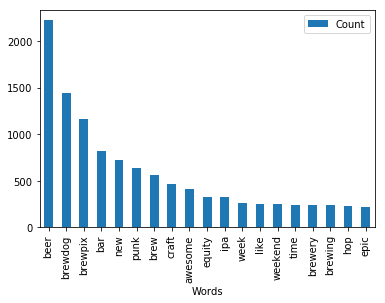

In [290]:
%matplotlib inline
words_df[words_df['Count'] > 200 ].plot(x='Words',kind='bar')

## Group by Date & Time

In [292]:
date_df =pd.DataFrame(pd.to_datetime(brewdog_df.created_time))
date_df.head()

,created_time
0,2017-07-29 09:30:00
1,2017-07-28 16:55:01
2,2017-07-28 15:12:39
3,2017-07-28 10:24:41
4,2017-07-27 15:15:00


In [321]:
type(date_df['created_time'])

pandas.core.series.Series

In [293]:
date_df.created_time.loc[0]

Timestamp('2017-07-29 09:30:00')

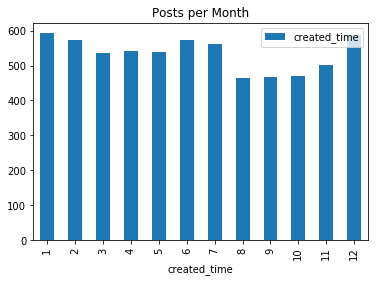

In [294]:
%matplotlib inline
fig_month=date_df.groupby(date_df.created_time.dt.month).count().plot(kind="bar",title="Posts per Month")
fig_month

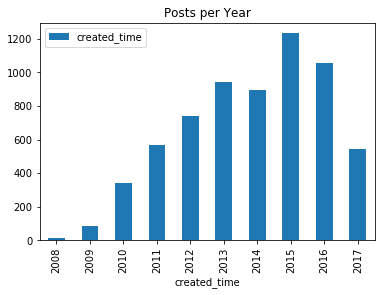

In [296]:
fig_year=date_df.groupby(date_df.created_time.dt.year).count().plot(kind="bar",title="Posts per Year")
fig_year

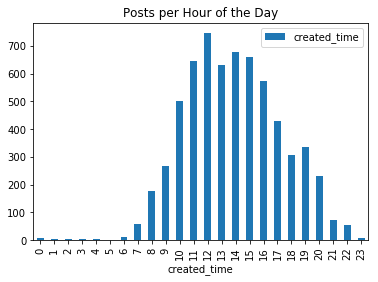

In [300]:
fig_hour=date_df.groupby(date_df.created_time.dt.hour).count().plot(kind="bar",title="Posts per Hour of the Day")
fig_hour

## Number of Likes & Time of Post

In [304]:
brewdog_df['created_time'] =  pd.to_datetime(brewdog_df['created_time'])
brewdog_df.head(10)


,total_comments,created_time,id,total_likes,message
0,85,2017-07-29 09:30:00,21251598643_10157023200443644,877,When you see a fresh pint of PunkIPA being pou...
1,42,2017-07-28 16:55:01,21251598643_10157026990843644,195,Rolling towards the weekend...\n\nWhat's first...
2,3,2017-07-28 15:12:39,21251598643_10157026772808644,25,“*Drumroll please!*\n\nAnd the winner is… Jenn...
3,21,2017-07-28 10:24:41,21251598643_10157026143968644,296,Slot Machine ✔️\n\nHomicidal Puppet Help Desk ...
4,107,2017-07-27 15:15:00,21251598643_10157023539678644,807,IT JUST GOT REAL...24 hours left to invest in ...
5,0,2017-07-27 10:23:15,21251598643_10157022954943644,127,Ever wondered what it’s like to live the dream...
6,367,2017-07-26 15:09:43,21251598643_10157020288548644,307,Win tickets to London Craft Beer Festival!!\n\...
7,46,2017-07-26 10:12:37,21251598643_10157019494158644,456,Guess what's back in the online shop....HAZY F...
8,8,2017-07-25 16:25:17,21251598643_10157016822788644,123,LoneWolf Spirits need your help to do for craf...
9,693,2017-07-25 10:36:02,21251598643_10157015278103644,3229,"Australia, we're coming for you! 🇦🇺️🍻\n\nBuild..."


In [338]:
brewdog_time = brewdog_df[['created_time', 'total_likes', 'total_comments']]
brewdog_time.head(10)

,created_time,total_likes,total_comments
0,2017-07-29 09:30:00,877,85
1,2017-07-28 16:55:01,195,42
2,2017-07-28 15:12:39,25,3
3,2017-07-28 10:24:41,296,21
4,2017-07-27 15:15:00,807,107
5,2017-07-27 10:23:15,127,0
6,2017-07-26 15:09:43,307,367
7,2017-07-26 10:12:37,456,46
8,2017-07-25 16:25:17,123,8
9,2017-07-25 10:36:02,3229,693


In [358]:
time_likes=brewdog_time.groupby(brewdog_time.created_time.dt.hour)['total_likes'].sum()
time_likes.head(24)

created_time
0       915
1       403
2       266
3       127
4        90
5        65
6       306
7      2878
8     11325
9     20948
10    58365
11    77219
12    98347
13    83981
14    83430
15    91099
16    71680
17    45169
18    37786
19    35594
20    22032
21     3088
22     4557
23      683
Name: total_likes, dtype: int64

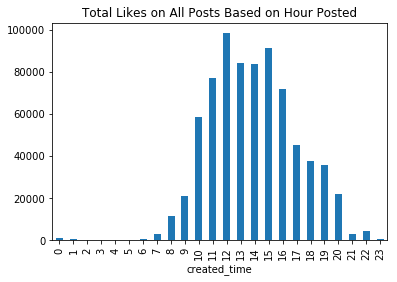

In [398]:
fig_time_likes = brewdog_time.groupby(brewdog_time.created_time.dt.hour)['total_likes'].sum().plot(kind="bar",title="Total Likes on All Posts Based on Hour Posted")


## Number of Comments & Time of Post

In [342]:
time_comments=brewdog_time.groupby(brewdog_time.created_time.dt.hour)['total_comments'].sum()
time_comments.head(24)


created_time
0        72
1        25
2        17
3        14
4        10
5        23
6        95
7       721
8      3279
9      4573
10    11175
11    10023
12    15404
13    10898
14    11613
15    12007
16     8106
17     5977
18     5488
19     9681
20     5575
21     1052
22     1021
23       62
Name: total_comments, dtype: int64

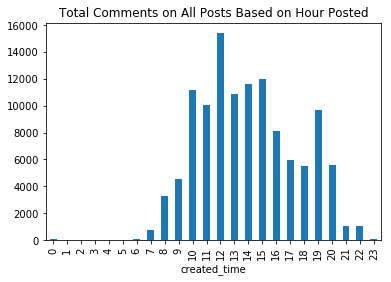

In [399]:
fig_time_comments = brewdog_time.groupby(brewdog_time.created_time.dt.hour)['total_comments'].sum().plot(kind="bar",title="Total Comments on All Posts Based on Hour Posted")

## Average Likes and Comments Per Post for Each Hour of the Day

In [393]:
hour_of_day = date_df.groupby(brewdog_time.created_time.dt.hour).count()
hour_of_day.head()

,created_time
created_time,
0,6
1,5
2,3
3,4
4,3


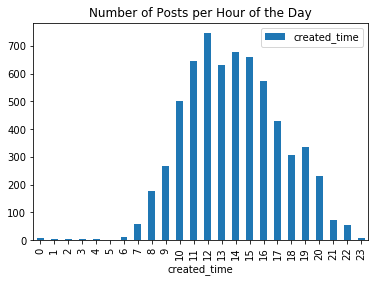

In [395]:
fig_hour=date_df.groupby(brewdog_time.created_time.dt.hour).count().plot(kind="bar",title="Number of Posts per Hour of the Day")
fig_hour

In [394]:
combined_time_com = pd.concat([hour_of_day, time_comments], axis=1)
combined_time_com.columns = ['total_posts', 'total_comments']
combined_time.head()

,total_posts,total_comments
created_time,,
0,6,72
1,5,25
2,3,17
3,4,14
4,3,10


In [378]:
combined_time_com_like = pd.concat([combined_time_com, time_likes], axis=1)
combined_time_com_like.head(24)

,total_posts,total_comments,total_likes
created_time,,,
0,6,72,915
1,5,25,403
2,3,17,266
3,4,14,127
4,3,10,90
5,1,23,65
6,12,95,306
7,58,721,2878
8,177,3279,11325


In [379]:
combined_time_com_like['average_comments_per_post'] = combined_time_com_like['total_comments']/combined_time_com_like['total_posts']
combined_time_com_like.head()

,total_posts,total_comments,total_likes,average_comments_per_post
created_time,,,,
0,6,72,915,12.000000
1,5,25,403,5.000000
2,3,17,266,5.666667
3,4,14,127,3.500000
4,3,10,90,3.333333


In [381]:
combined_time_com_like['average_likes_per_post'] = combined_time_com_like['total_likes']/combined_time_com_like['total_posts']
combined_time_com_like.head(24)

,total_posts,total_comments,total_likes,average_comments_per_post,average_likes_per_post
created_time,,,,,
0,6,72,915,12.000000,152.500000
1,5,25,403,5.000000,80.600000
2,3,17,266,5.666667,88.666667
3,4,14,127,3.500000,31.750000
4,3,10,90,3.333333,30.000000
5,1,23,65,23.000000,65.000000
6,12,95,306,7.916667,25.500000
7,58,721,2878,12.431034,49.620690
8,177,3279,11325,18.525424,63.983051


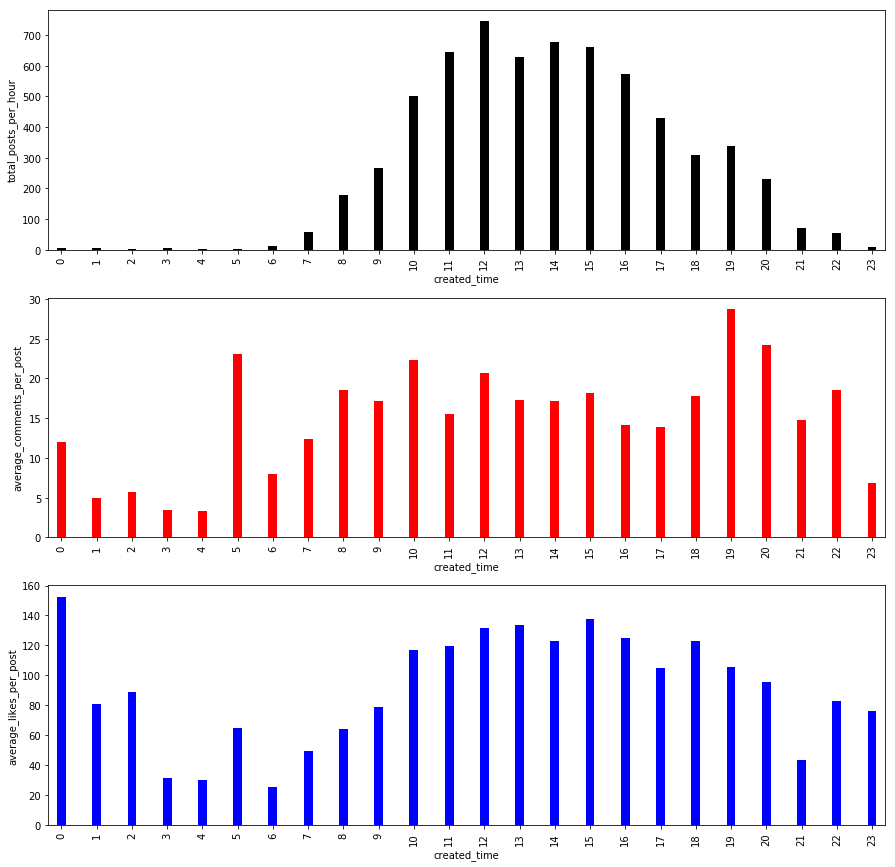

In [402]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

combined_time_com_like['total_posts'].plot(kind='bar', color='black', ax=ax1, width=0.25)
combined_time_com_like['average_comments_per_post'].plot(kind='bar', color='red', ax=ax2, width=0.25)
combined_time_com_like['average_likes_per_post'].plot(kind='bar', color='blue', ax=ax3, width=0.25)
ax1.set_ylabel('total_posts_per_hour')
ax2.set_ylabel('average_comments_per_post')
ax3.set_ylabel('average_likes_per_post')
plt.show()